In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

from google.colab import files

# Data Loading

Melakukan installasi untuk mengambil data dari Kaggle

In [2]:
!pip install q kaggle

Meng-upload file kaggle.json yang berisi Kaggle API sehingga memungkinkan untuk mengambil data dari Kaggle

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fadiyahsutopo","key":"266f9358ff5d2be9a1be74602f8db058"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Mengunduh dataset **Travel Insurance Prediction Data** yang dapat diakses melalui link berikut: https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data

In [5]:
!kaggle datasets download -d tejashvi14/travel-insurance-prediction-data

  0% 0.00/13.0k [00:00<?, ?B/s]
100% 13.0k/13.0k [00:00<00:00, 42.3MB/s]


In [6]:
! unzip /content/travel-insurance-prediction-data.zip

Archive:  /content/travel-insurance-prediction-data.zip
  inflating: TravelInsurancePrediction.csv  


In [7]:
df = pd.read_csv("/content/TravelInsurancePrediction.csv")

df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


Berdasarkan output di atas di dalam dataset ini terdapat:
* 10 kolom
* 1987 baris

# Exploratory Data Analysis (EDA)

Mengambil informasi mengenai deskripsi variabel yang terdapat di dalam dataset ini

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


Berdasarkan output di atas, terlihat bahwa dalam dataset ini terdapat 6 kolom dengan tipe int64 dan 4 kolom dengan tipe object

In [9]:
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


Memeriksa apakah terdapat data null di setiap kolom

In [10]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

Memeriksa apakah terdapat data duplicate

In [11]:
df.duplicated().sum()

0

## Menangani Outlier

<Axes: xlabel='Age'>

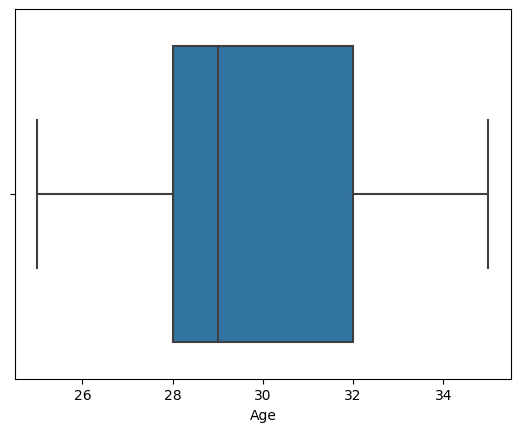

In [12]:
sns.boxplot(x=df['Age'])

<Axes: xlabel='AnnualIncome'>

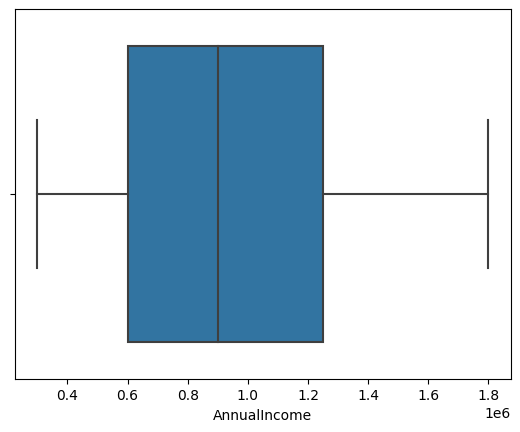

In [13]:
sns.boxplot(x=df['AnnualIncome'])

<Axes: xlabel='FamilyMembers'>

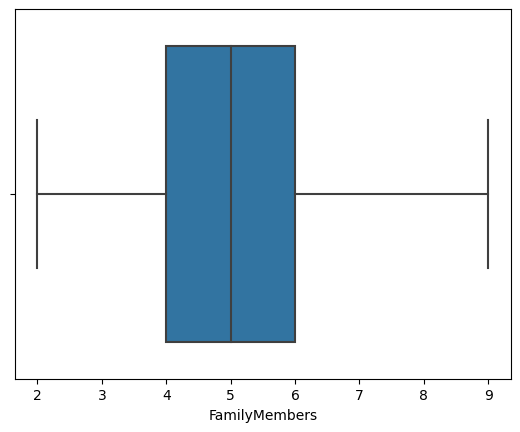

In [14]:
sns.boxplot(x=df['FamilyMembers'])

<Axes: xlabel='ChronicDiseases'>

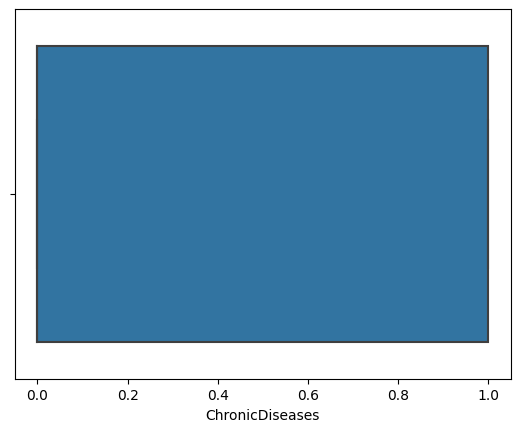

In [15]:
sns.boxplot(x=df['ChronicDiseases'])

<Axes: xlabel='TravelInsurance'>

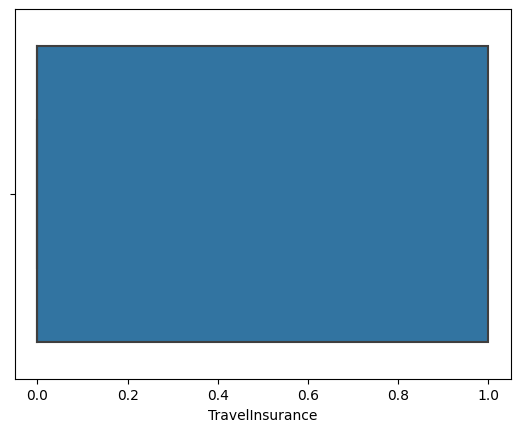

In [16]:
sns.boxplot(x=df['TravelInsurance'])

Berdasarkan visualisasi Box Plot di atas, tidak terlihat adanya outliers di dalam dataset ini. Namun, untuk lebih pasti, saya menerapkan metode IQR untuk menghapus data yang memiliki outliers

In [17]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1

df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

df.shape

<ipython-input-17-2797c95bc83a>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-17-2797c95bc83a>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-17-2797c95bc83a>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]


(1987, 10)

# Univariate Analysis

Membagi fitur-fitur yang ada di dalam dataset menjadi dua fitur, yaitu numerical_features dan categorical_features

In [18]:
numerical_features = ['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'TravelInsurance']
categorical_features = ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']

## Categorical features

                              Jumlah Data  Persentase
Private Sector/Self Employed         1417        71.3
Government Sector                     570        28.7


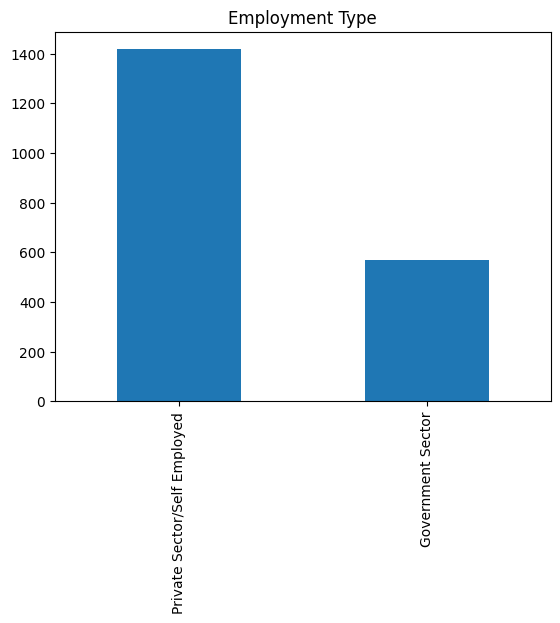

In [19]:
feature = categorical_features[0]

count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)

df_feature = pd.DataFrame({'Jumlah Data':count, 'Persentase':percent.round(1)})

print(df_feature)
count.plot(kind='bar', title=feature);

Di dalam fitur 'Employment Type' terdapat dua kategori yaitu Private Sector/Self Employed dengan jumlah terbanyak dengan persentase 71.31% dan Goverment Sector dengan persentase 28.69%

     Jumlah Data  Persentase
Yes         1692        85.2
No           295        14.8


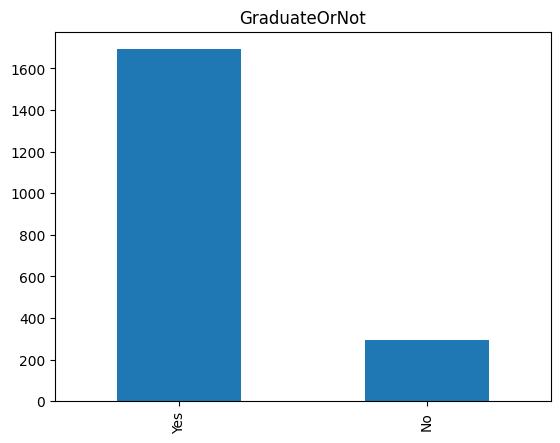

In [20]:
feature = categorical_features[1]

count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)

df_feature = pd.DataFrame({'Jumlah Data':count, 'Persentase':percent.round(1)})
print(df_feature)

count.plot(kind='bar', title=feature);

Di dalam fitur 'GraduateOrNot' terdapat dua kategori yaitu Yes dengan persentase sebesar 85.2% dan No dengan persentase 14.8%

     Jumlah Data  Persentase
No          1570        79.0
Yes          417        21.0


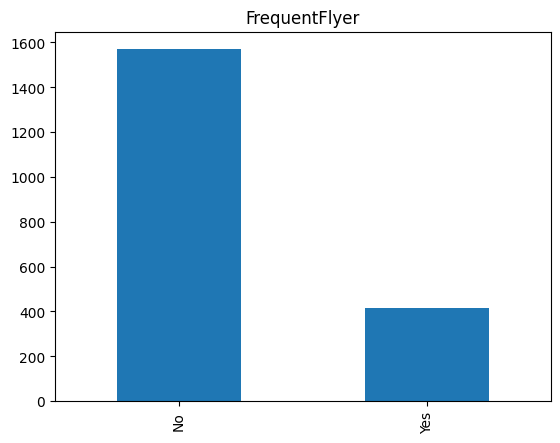

In [21]:
feature = categorical_features[2]

count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)

df_feature = pd.DataFrame({'Jumlah Data':count, 'Persentase':percent.round(1)})
print(df_feature)

count.plot(kind='bar', title=feature);

Di dalam fitur 'FrequentFlyer' terdapat dua kategori yaitu No dengan persentase sebesar 79% dan Yes dengan persentase 21%

     Jumlah Data  Persentase
No          1607        80.9
Yes          380        19.1


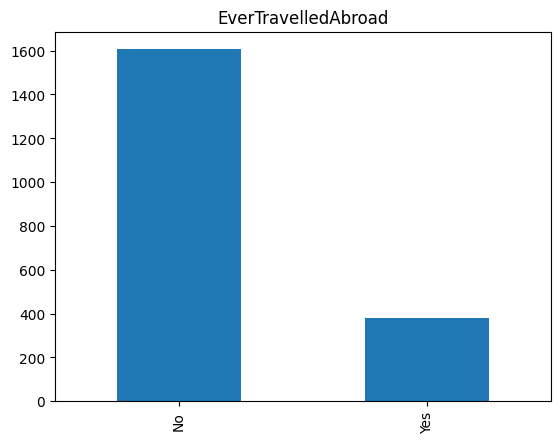

In [22]:
feature = categorical_features[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_feature = pd.DataFrame({'Jumlah Data':count, 'Persentase':percent.round(1)})
print(df_feature)
count.plot(kind='bar', title=feature);

Di dalam fitur 'EverTravelledAbroad' terdapat dua kategori yaitu No dengan persentase sebesar 80.9% dan Yes dengan persentase 19.1%

## Numerical features

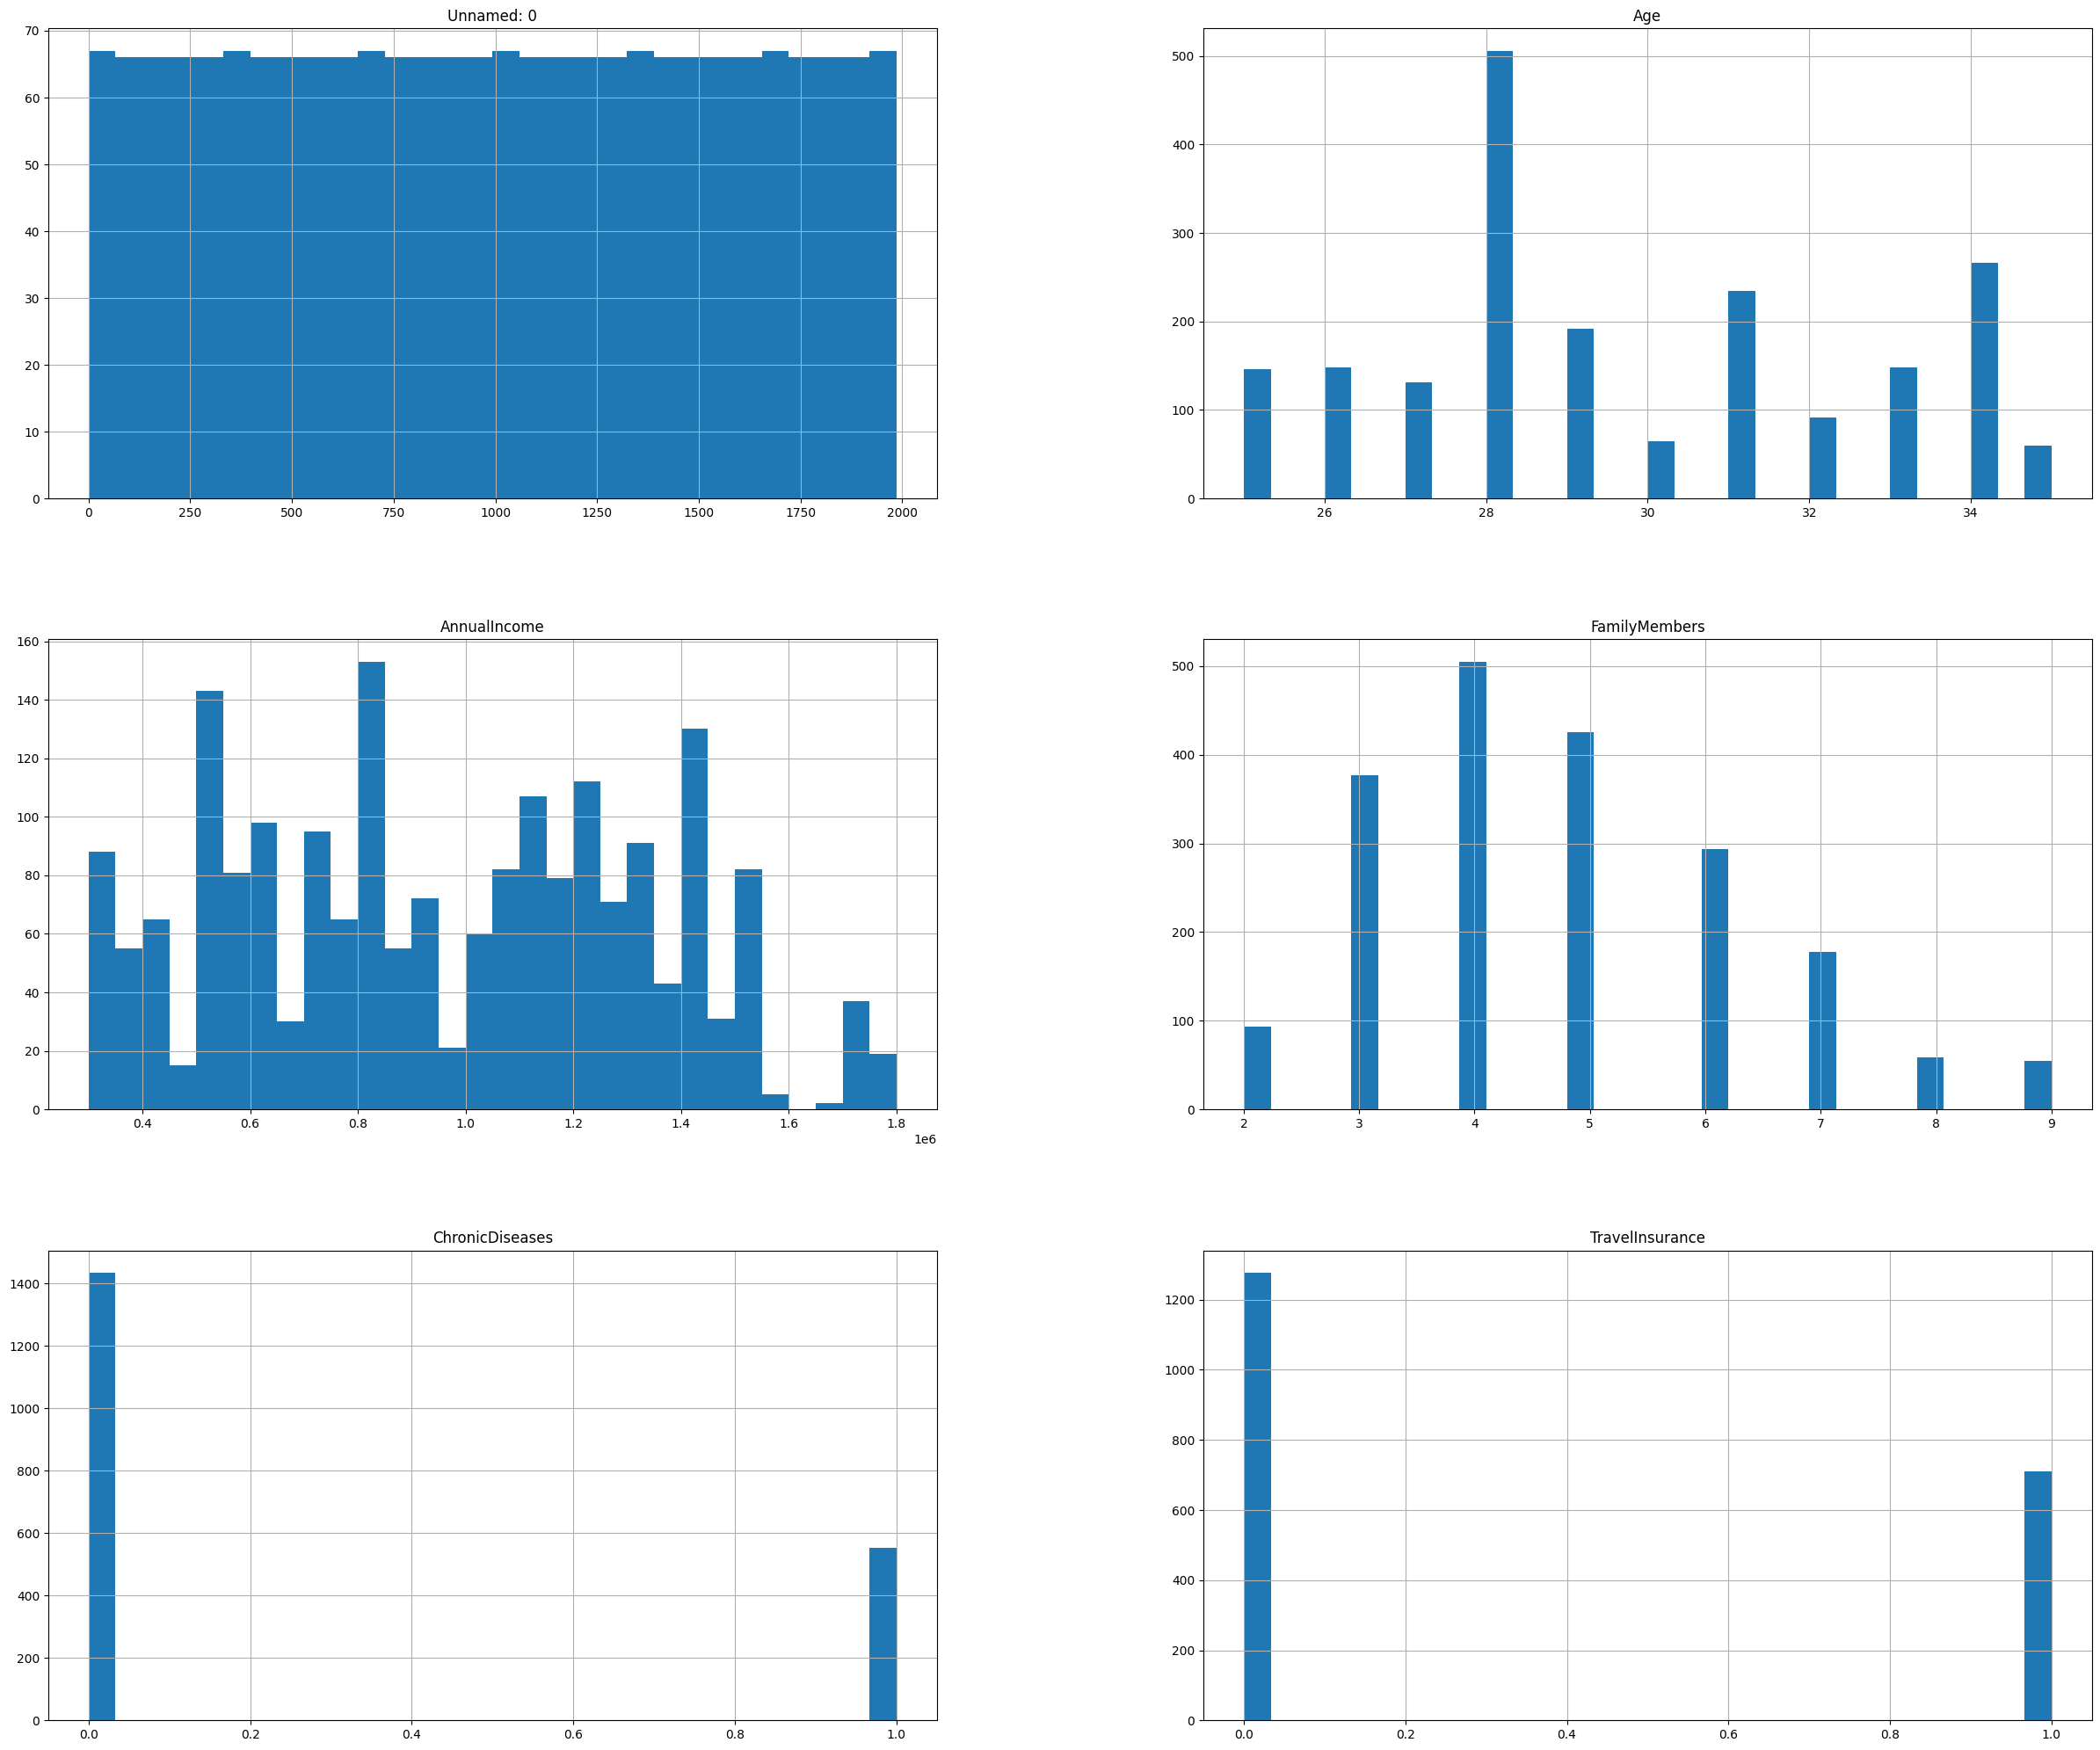

In [23]:
df.hist(bins=30, figsize=(30, 25))
plt.show()

Berdasarkan histogram di atas, dapat disimpulkan bahwa:
* Data didominasi oleh customer yang berusia 28 tahun
* Kategori jumlah anggota keluarga yang tinggal bersama customer terbanyak adalah 4 orang dan tersedikit adalah 9 orang
* Jumlah customer yang tidak memiliki chronic disease atau penyakit kronis lebih dari setengah jumlah customer yang memiliki penyakit kronis
* Jumlah customer yang tidak memiliki asuransi perjalanan lebih banyak daripada customer yang memiliki asuransi perjalanan

# Multivariate analysis

Memeriksa rata-rata fitur TravelInsurance terhadap setiap fitur kategori

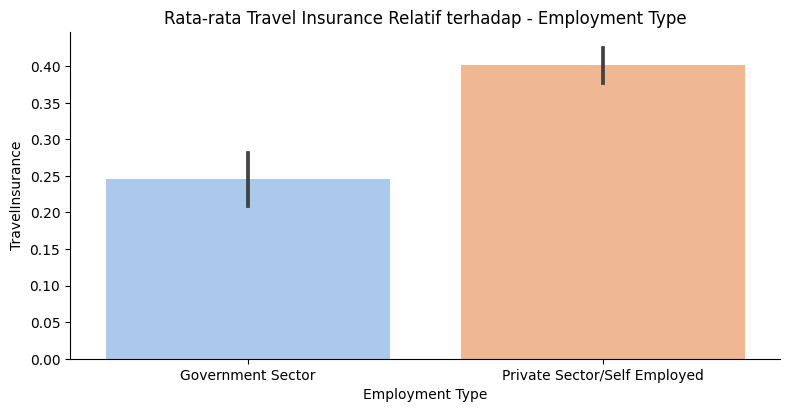

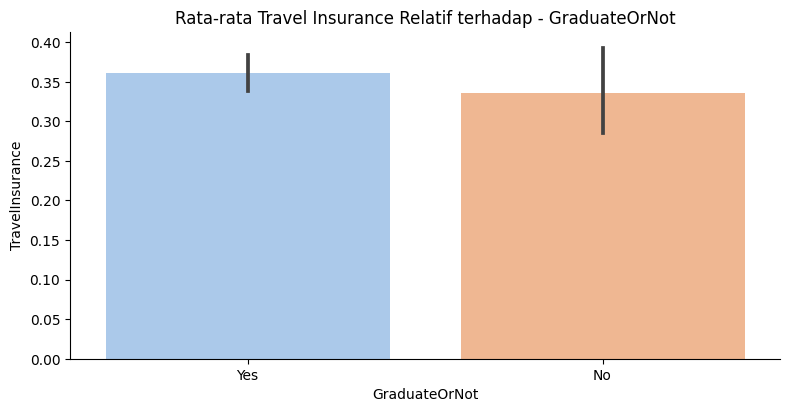

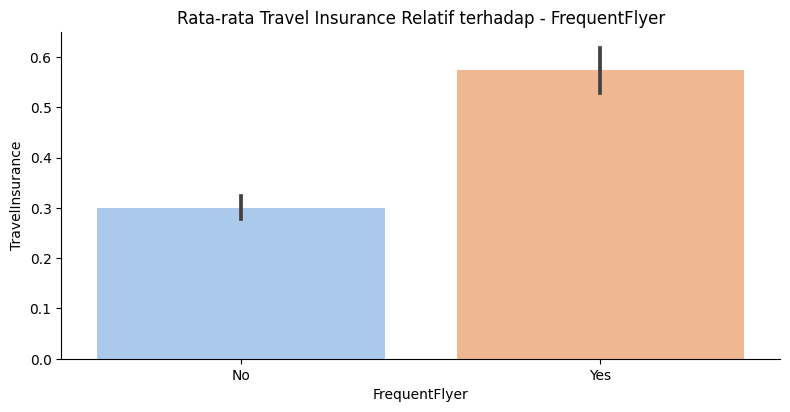

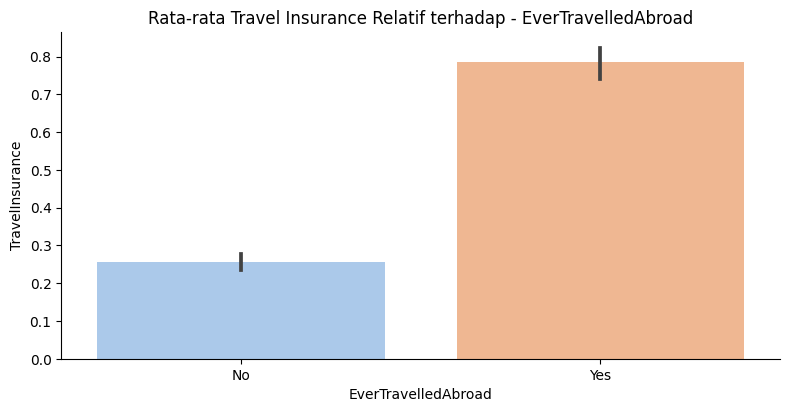

In [24]:
categorical_features = df.select_dtypes(include='object').columns.to_list()

for col in categorical_features:
  sns.catplot(x=col, y="TravelInsurance", kind="bar", dodge=False, height = 4, aspect = 2,  data=df, palette="pastel")
  plt.title("Rata-rata Travel Insurance Relatif terhadap - {}".format(col))

Berdasarkan diagram di atas, dapat disimpulkan bahwa:
* Pada fitur EmploymentType, kategori Private Sector/Private Employed memiliki pengaruh terhadap pembelian asuransi perjalanan
* Rata-rata pembelian asuransi perjalanan terhadap fitur GraduateOrNot cenderung mirip
* Fitur FrequentFlyer dengan kategori Yes memiliki pengaruh yang signifikan terhadap pembelian asuransi perjalanan
* Pada fitur EverTravelledAbroad, customer sudah pernah pergi ke luar negeri memiliki pengaruh yang tinggi terhadap pembelian asuransi perjalanan

Selanjutnya menampilkan visualisasi relasi antara fitur-fitur numerik dengan fitur 'TravelInsurance' menggunakan pairplot

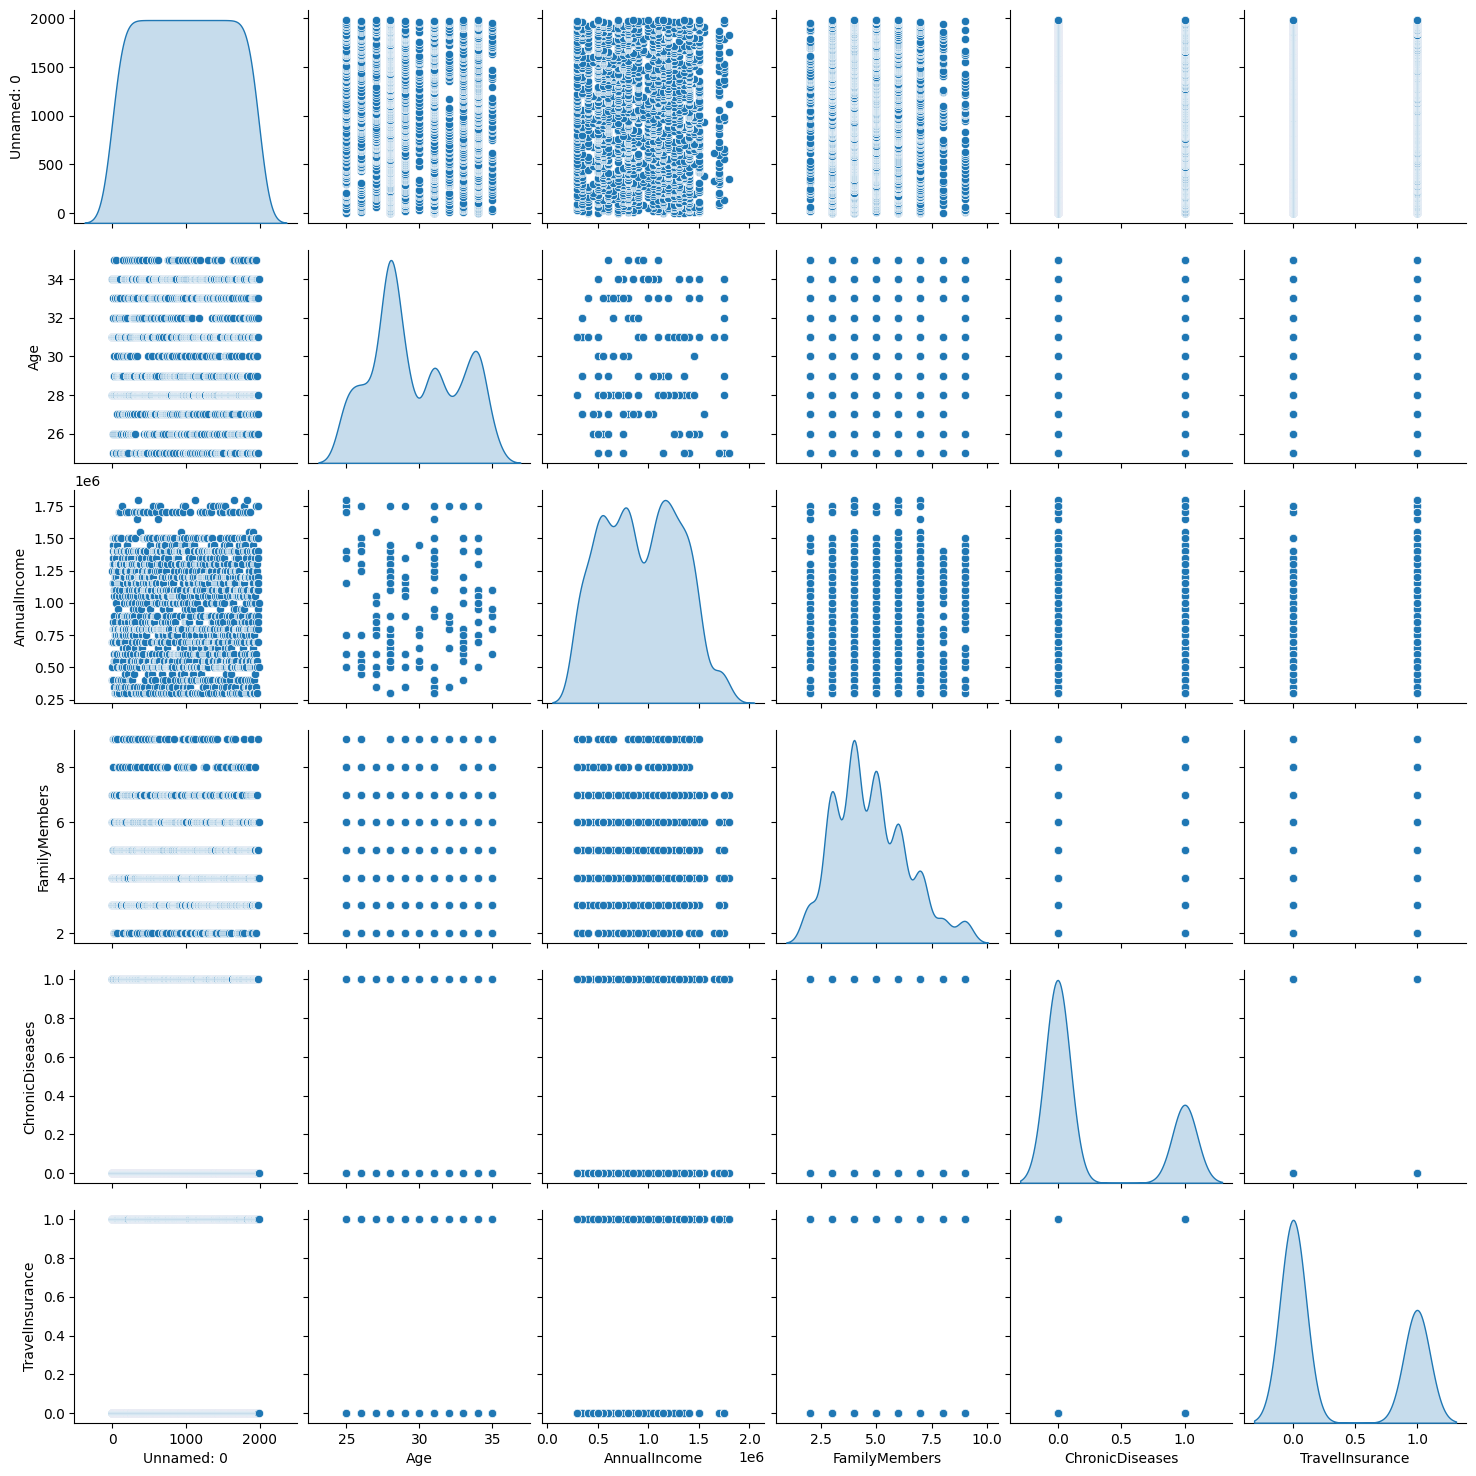

In [25]:
sns.pairplot(df, diag_kind = 'kde')

Selanjutnya menampilkan korelasi antar fitur numerik menggunakan correlation matrix

<ipython-input-26-54bf653cefda>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix antar Fitur Numerik ')

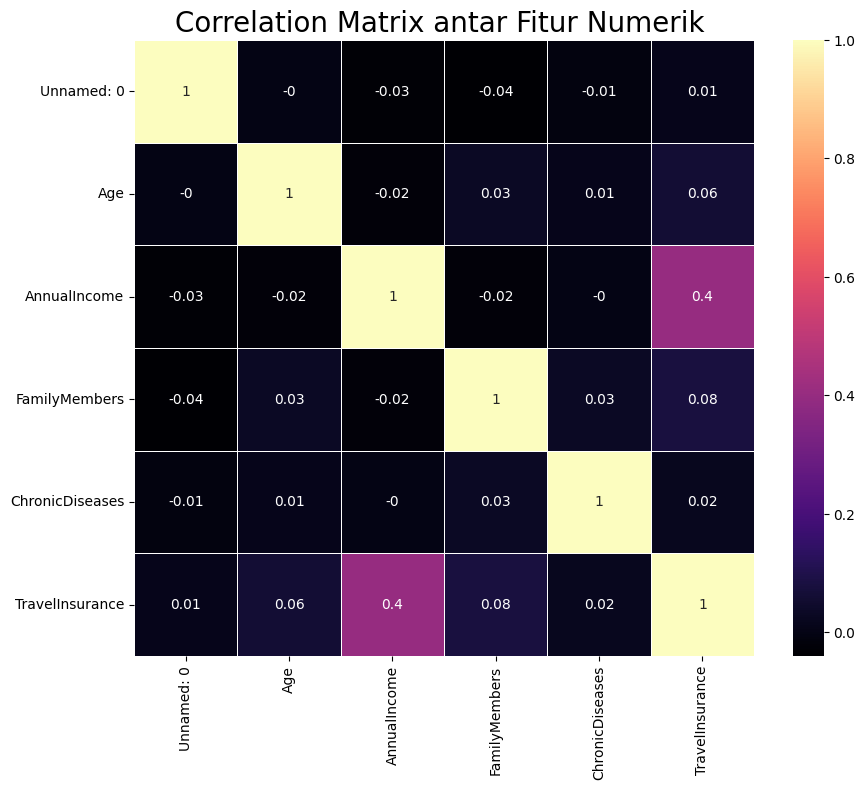

In [26]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='magma', linewidths=0.5, )
plt.title("Correlation Matrix antar Fitur Numerik ", size=20)

Berdasarkan correlation matrix di atas, korelasi antara fitur 'Unnamed: 0' dengan fitur lainnya memiliki korelasi yang sangat rendah sehingga fitur tersebut akan dihilangkan

In [27]:
df.drop(['Unnamed: 0'], inplace=True, axis=1)
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


# Data Preparation

## Encoding Fitur Kategori

Melakukan encoding fitur kategori menggunakan teknik one-hot-encoding yang telah disediakan oleh library scikit-learn

In [28]:
from sklearn.preprocessing import  OneHotEncoder

df = pd.concat([df, pd.get_dummies(df['Employment Type'], prefix='Employment Type')],axis=1)
df = pd.concat([df, pd.get_dummies(df['GraduateOrNot'], prefix='GraduateOrNot')],axis=1)
df = pd.concat([df, pd.get_dummies(df['FrequentFlyer'], prefix='FrequentFlyer')],axis=1)
df = pd.concat([df, pd.get_dummies(df['EverTravelledAbroad'], prefix='EverTravelledAbroad')],axis=1)

df.drop(['Employment Type','GraduateOrNot','FrequentFlyer', 'EverTravelledAbroad'], axis=1, inplace=True)
df.head()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
0,31,400000,6,1,0,1,0,0,1,1,0,1,0
1,31,1250000,7,0,0,0,1,0,1,1,0,1,0
2,34,500000,4,1,1,0,1,0,1,1,0,1,0
3,28,700000,3,1,0,0,1,0,1,1,0,1,0
4,28,700000,8,1,0,0,1,0,1,0,1,1,0


## Train-Test-Split

Memecah dataset menjadi data training dan data testing dengan 'test_size = 0.2' atau proporsinya 80:20, 80% data training dan 20% data testing menggunakan library scikit-learn train_test_split

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop(["TravelInsurance"],axis =1)
y = df["TravelInsurance"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [30]:
print(f'Total jumlah seluruh data: {len(X)}')
print(f'Total data train: {len(X_train)}')
print(f'Total data test: {len(X_test)}')

Total jumlah seluruh data: 1987
Total data train: 1589
Total data test: 398


## Standarisasi

Melakukan standarisasi pada fitur numerik menggunakan teknik StandardScaler yang telah disediakan oleh library scikit-learn

In [31]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases
1803,1.155396,1.238204,0.159378,-0.604252
257,1.155396,-1.034206,0.159378,-0.604252
1028,-1.591451,0.569848,-1.091247,1.654939
1416,-1.248095,-0.900535,0.784690,1.654939
1069,-0.561384,-0.365850,-0.465935,1.654939


In [32]:
X_train[numerical_features].describe().round(2)

,Age,AnnualIncome,FamilyMembers,ChronicDiseases
count,1589.00,1589.00,1589.00,1589.00
mean,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.59,-1.70,-1.72,-0.60
25%,-0.56,-0.90,-0.47,-0.60
50%,-0.22,-0.10,0.16,-0.60
75%,0.81,0.84,0.78,1.65
max,1.84,2.31,2.66,1.65


Nilai mean telah berubah menjadi 0 dan nilai standar deviasi menjadi 1

# Modelling

Menyiapkan dataframe untuk menyimpan hasil analisis model dengan kolom yang terdiri dari 'KNN', 'RandomForest', dan 'Boosting'

In [42]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

## Melatih data menggunakan algoritma KNN

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

## Melatih data menggunakan algoritma Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=20, max_depth=15, random_state=123, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

## Melatih data menggunakan algoritma Boosting

In [45]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=123)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# Evaluasi Model

Melakukan scaling terhadap fitur numerik yang terdapat dalam X_test sehingga memiliki rata-rata sebesar 0 dan varians sebesar 1

In [46]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [47]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
KNN,0.000126,0.000237
RF,0.000067,0.000213
Boosting,0.000138,0.00028


Melakukan plot hasil mse di atas menggunakan bar chart

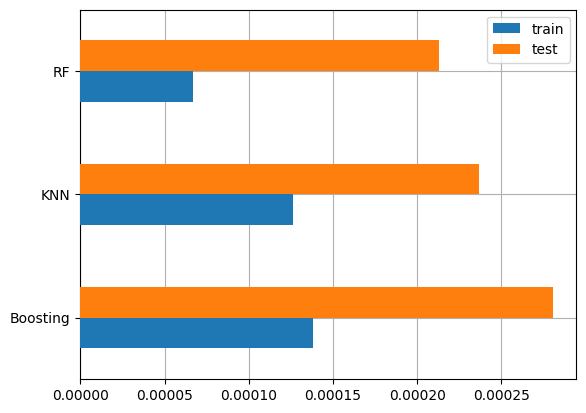

In [48]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Selanjutnya dilakukan prediksi pengujian menggunakan data testing

In [49]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(2)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
327,0,0.43,0.0,0.08


Berdasarkan hasil pengujian, terlihat bahwa algoritma Random Forest memberikan hasil yang mendekati.